In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,make_scorer,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,auc
from imblearn.over_sampling import SMOTE 

In [2]:
df = pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [3]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [4]:
X = df.iloc[:,2:]

In [5]:
X


,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,0.062940,0.060357,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,0.345709,0.267194,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,0.101821,0.069536,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,0.255328,0.286365,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [6]:
y = df["FLAG"]

In [7]:
y

0        1
1        1
2        1
3        1
4        1
        ..
40251    0
40252    0
40253    0
40254    0
40255    0
Name: FLAG, Length: 40256, dtype: int64

In [8]:
X= np.array(X)
y= np.array(y)


In [9]:
print(X.shape)
print(y.shape)

(40256, 1034)
(40256,)


# using SMOTE 

In [20]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=0.2,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.20)

In [22]:
mod_lda = LinearDiscriminantAnalysis()

In [23]:
mod_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [24]:
y_pred =mod_lda.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      7312
           1       0.44      0.09      0.15      1491

    accuracy                           0.83      8803
   macro avg       0.64      0.53      0.53      8803
weighted avg       0.77      0.83      0.78      8803



Confusion matrix LDA@80
[[7141  171]
 [1354  137]]
Normalized confusion matrix
[[0.97661379 0.02338621]
 [0.90811536 0.09188464]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


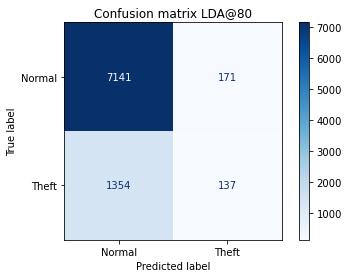

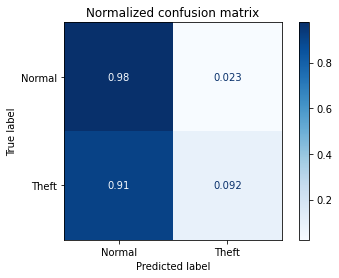

In [26]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix LDA@80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(mod_lda,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [27]:
probs = mod_lda.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

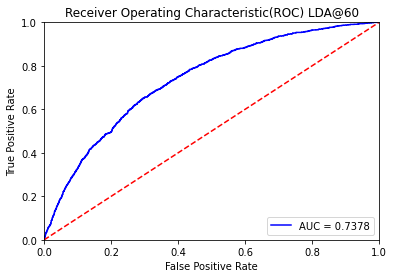

In [28]:
plt.title("Receiver Operating Characteristic(ROC) LDA@60")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## break here

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.40)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [17]:
mod_lda = LinearDiscriminantAnalysis()

In [19]:
mod_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [21]:
y_pred =mod_lda.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     14717
           1       0.39      0.05      0.09      1386

    accuracy                           0.91     16103
   macro avg       0.65      0.52      0.52     16103
weighted avg       0.87      0.91      0.88     16103



In [25]:
accuracy_score(y_test,y_pred)

0.9112587716574552

In [26]:
#normalized false gives the no of corryectly classifies out of sample
#normalized True gives percentage accuracy
count = accuracy_score(y_test,y_pred,normalize=False)

In [27]:
print(f"No of correctly classified samples {count} out of {len(y_test)}")

No of correctly classified samples 14674 out of 16103


In [31]:
cm = confusion_matrix(y_test,y_pred,labels=mod_lda.classes_)

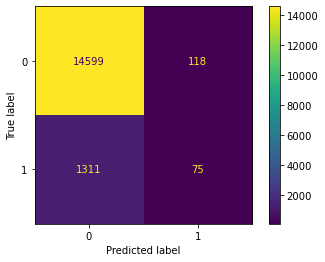

In [35]:
ConfusionMatrixDisplay(cm,display_labels=mod_lda.classes_).plot();

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix LDA@60
[[14599   118]
 [ 1311    75]]
Normalized confusion matrix
[[0.99198206 0.00801794]
 [0.94588745 0.05411255]]


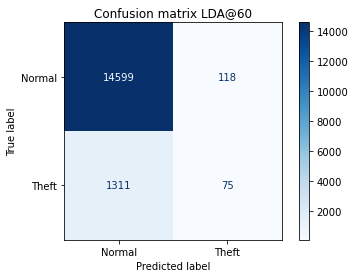

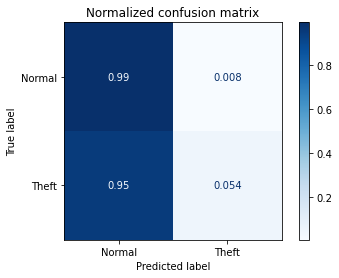

In [36]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix LDA@60",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(mod_lda,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [39]:
probs = mod_lda.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

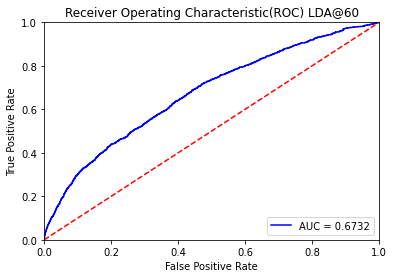

In [40]:
plt.title("Receiver Operating Characteristic(ROC) LDA@60")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()